# Alex Belianinov
# Center for Nanophase Materials Sciences, 
# Oak Ridge National Laboratory 

### Edge Detection Example

* Canny Edge Detection is a popular edge detection algorithm.
1. Noise Redection
2. Finding Intensity Gradient of the Image
3. Non-maximum Suppression
4. Hysteresis Thresholding

In [1]:
import numpy as np #fast math
import cv2 as cv #image processing
from matplotlib import pyplot as plt #plotting
from skimage.measure import label, regionprops #label and measure properties of disconnected componenents
from skimage.color import label2rgb # visualization
import matplotlib.patches as mpatches #visualization

plt.rcParams['figure.figsize'] = [40, 20] #figure size
%matplotlib inline 

In [2]:
img = cv.imread('ex DEE28_7 1 x750 1.tif',0) #take data in at a single color channel

(943, 1024)


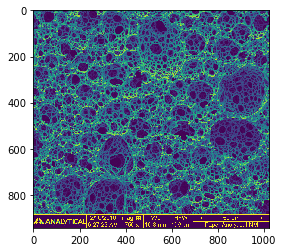

In [3]:
plt.imshow(img)
print(np.shape(img))

(843, 1024)


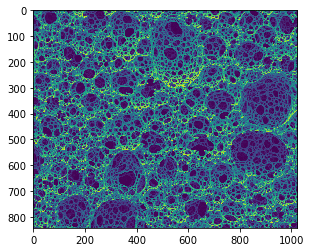

In [4]:
img_crop = img[:-100,:]
plt.imshow(img_crop)
plt.rcParams['figure.figsize'] = [40, 20] 
print(np.shape(img_crop))

In [5]:
edges = cv.Canny(img_crop, 40, 80)

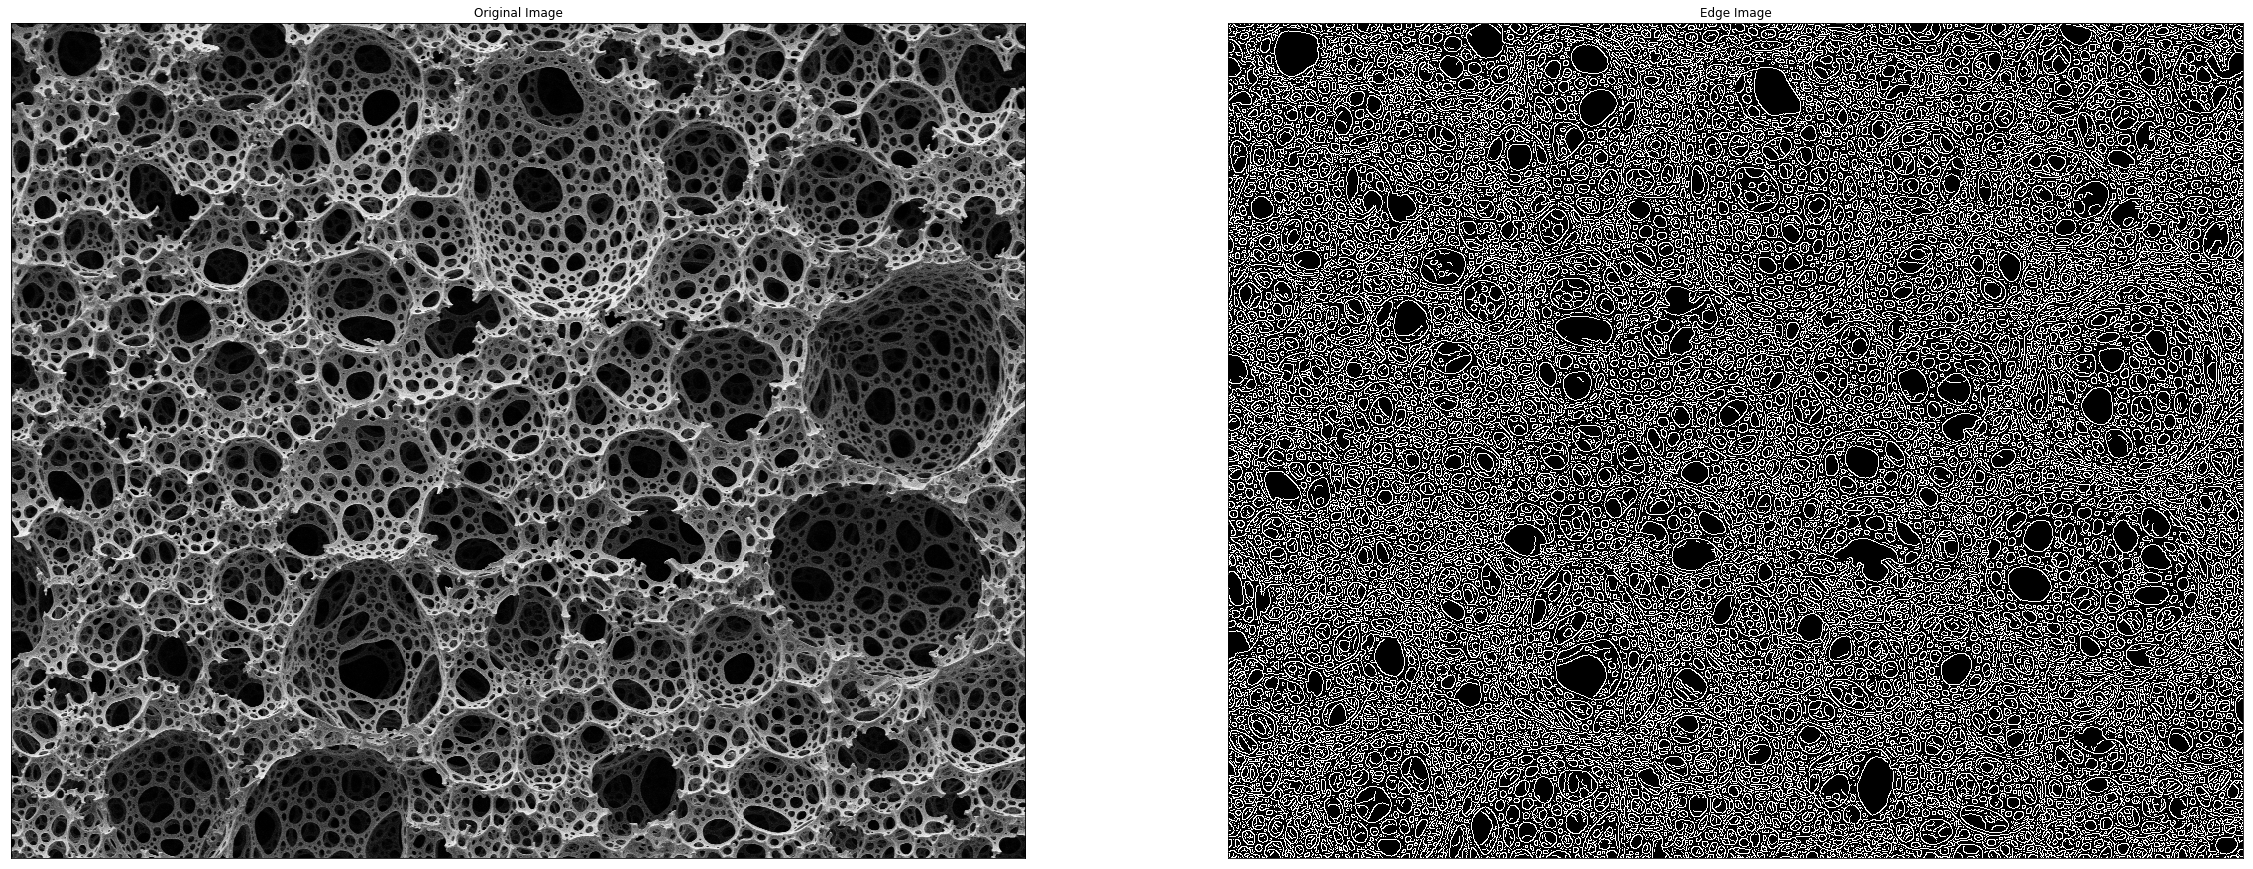

In [6]:
plt.subplot(121),plt.imshow(img_crop,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.rcParams['figure.figsize'] = [40, 20] 
plt.show()

In [7]:
print(edges)


[[  0 255   0 ..., 255 255 255]
 [255 255   0 ...,   0   0   0]
 [  0   0 255 ...,   0   0   0]
 ..., 
 [  0 255   0 ...,   0   0   0]
 [  0 255   0 ..., 255 255 255]
 [255   0   0 ...,   0   0   0]]


In [8]:
label_image = label(edges)

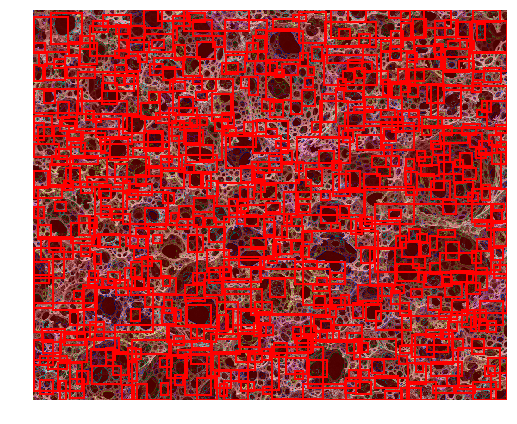

In [9]:
image_label_overlay = label2rgb(label_image, image=img_crop)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 80:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()